Unzipping and adding the data to a pandas dataframe

In [48]:
import zipfile
import pandas as pd
z = zipfile.ZipFile("../data/vehicles.zip")
z.extractall()

vehicles = pd.read_csv("vehicles.csv")

Remove un-needed columns

In [49]:
print(vehicles.isna().sum() / vehicles.shape[0] * 100)

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
image_url         0.015930
description       0.016398
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
posting_date      0.015930
dtype: float64


In [50]:
# drop any listing with no make or model
dropped = vehicles.dropna(subset=['manufacturer', 'model', 'condition', 'size',])
print(dropped.shape)

unique_models = dropped['model'].unique()
print(len(unique_models))
cut_model_list = []

hsm = {}

for item in unique_models:
   arr = item.replace('-', '')
   arr = arr.split(' ', 1)[0]
   cut_model_list.append(arr)
   if arr in hsm:
      hsm[arr] += 1
   else:
      hsm[arr] = 1

nsm = {}

for item in hsm:
   if hsm[item] != 1:
      nsm[item] = hsm[item]
print(nsm)

# maybe

# print(len(cut_model_list))
# print(len(set(cut_model_list)))
# print(set(cut_model_list))
#print(dropped['model'].unique())
#print(dropped.isna().sum() / dropped.shape[0] * 100)

(90957, 26)
10269
{'f150': 266, 'compass': 21, 'f250': 143, 'odyssey': 26, 'f450': 33, 'charger': 38, 'town': 35, 'fj': 10, 'express': 47, 'grand': 84, 'tlx': 7, 'rx350': 8, 'gx470': 3, 'thunderbird': 11, 'silverado': 186, 'blazer': 10, '525i': 2, 'yukon': 38, 'accord': 111, 'tahoe': 36, 'miata': 10, 'corvette': 29, '3500': 76, 'tacoma': 75, 'benz': 245, 'tundra': 76, 'impala': 29, 'altima': 46, '360': 2, 'pathfinder': 24, 'q7': 23, 'trax': 7, 'eclipse': 15, 'prius': 51, 'camry': 59, 'solara': 9, 'ex35': 3, 'rogue': 24, 'trailblazer': 18, 'jetta': 61, 'sorento': 23, '1500': 125, 'sierra': 144, 'crv': 58, 'qx4': 3, 'civic': 66, 'accent': 11, 'escape': 55, '500l': 5, '2500': 94, 'z4': 13, 'challenger': 20, 'tl': 14, 'sonata': 35, 'escalade': 25, 'cherokee': 43, 'edge': 30, 'a3': 20, '4runner': 32, 'ss': 4, 'transit': 68, 'savana': 25, 'qx': 4, '3i': 3, 'commander': 11, 'super': 37, 'econoline': 25, 'fuso': 8, '4500': 3, '5500': 7, 'f750': 7, 'wrangler': 69, 'gladiator': 3, 'sonic': 11, '

In [51]:
vehicles = vehicles.drop(['county', 'url', 'image_url', 'region_url', 'id', 'VIN'], axis=1)
dropped.size

2364882

In [52]:
vehicles.head(100)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,auburn,2100,2006.0,subaru,impreza,fair,4 cylinders,gas,97000.0,clean,automatic,NaN,NaN,hatchback,NaN,Looking to sell my 2006 Subaru Impreza hatchba...,al,32.5475,-85.4682,2021-04-20T09:55:48-0500
96,auburn,80,2004.0,honda,NaN,excellent,6 cylinders,gas,94020.0,clean,automatic,NaN,NaN,NaN,NaN,Asking $800 Loaded 2004 Honda Accord EX-L! 94k...,al,32.8113,-85.1749,2021-04-19T12:55:06-0500
97,auburn,15990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,gas,29652.0,clean,other,fwd,NaN,hatchback,blue,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2021-04-19T10:51:13-0500
98,auburn,20590,2013.0,acura,mdx sport utility 4d,good,6 cylinders,gas,77087.0,clean,other,NaN,NaN,other,silver,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2021-04-19T10:50:57-0500


In [53]:
vehicles.describe()

,price,year,odometer,lat,long
count,4.268800e+05,425675.000000,4.224800e+05,420331.000000,420331.000000
mean,7.519903e+04,2011.235191,9.804333e+04,38.493940,-94.748599
std,1.218228e+07,9.452120,2.138815e+05,5.841533,18.365462
min,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,5.900000e+03,2008.000000,3.770400e+04,34.601900,-111.939847
50%,1.395000e+04,2013.000000,8.554800e+04,39.150100,-88.432600
75%,2.648575e+04,2017.000000,1.335425e+05,42.398900,-80.832039
max,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


In [54]:
print(vehicles.shape)

(426880, 20)


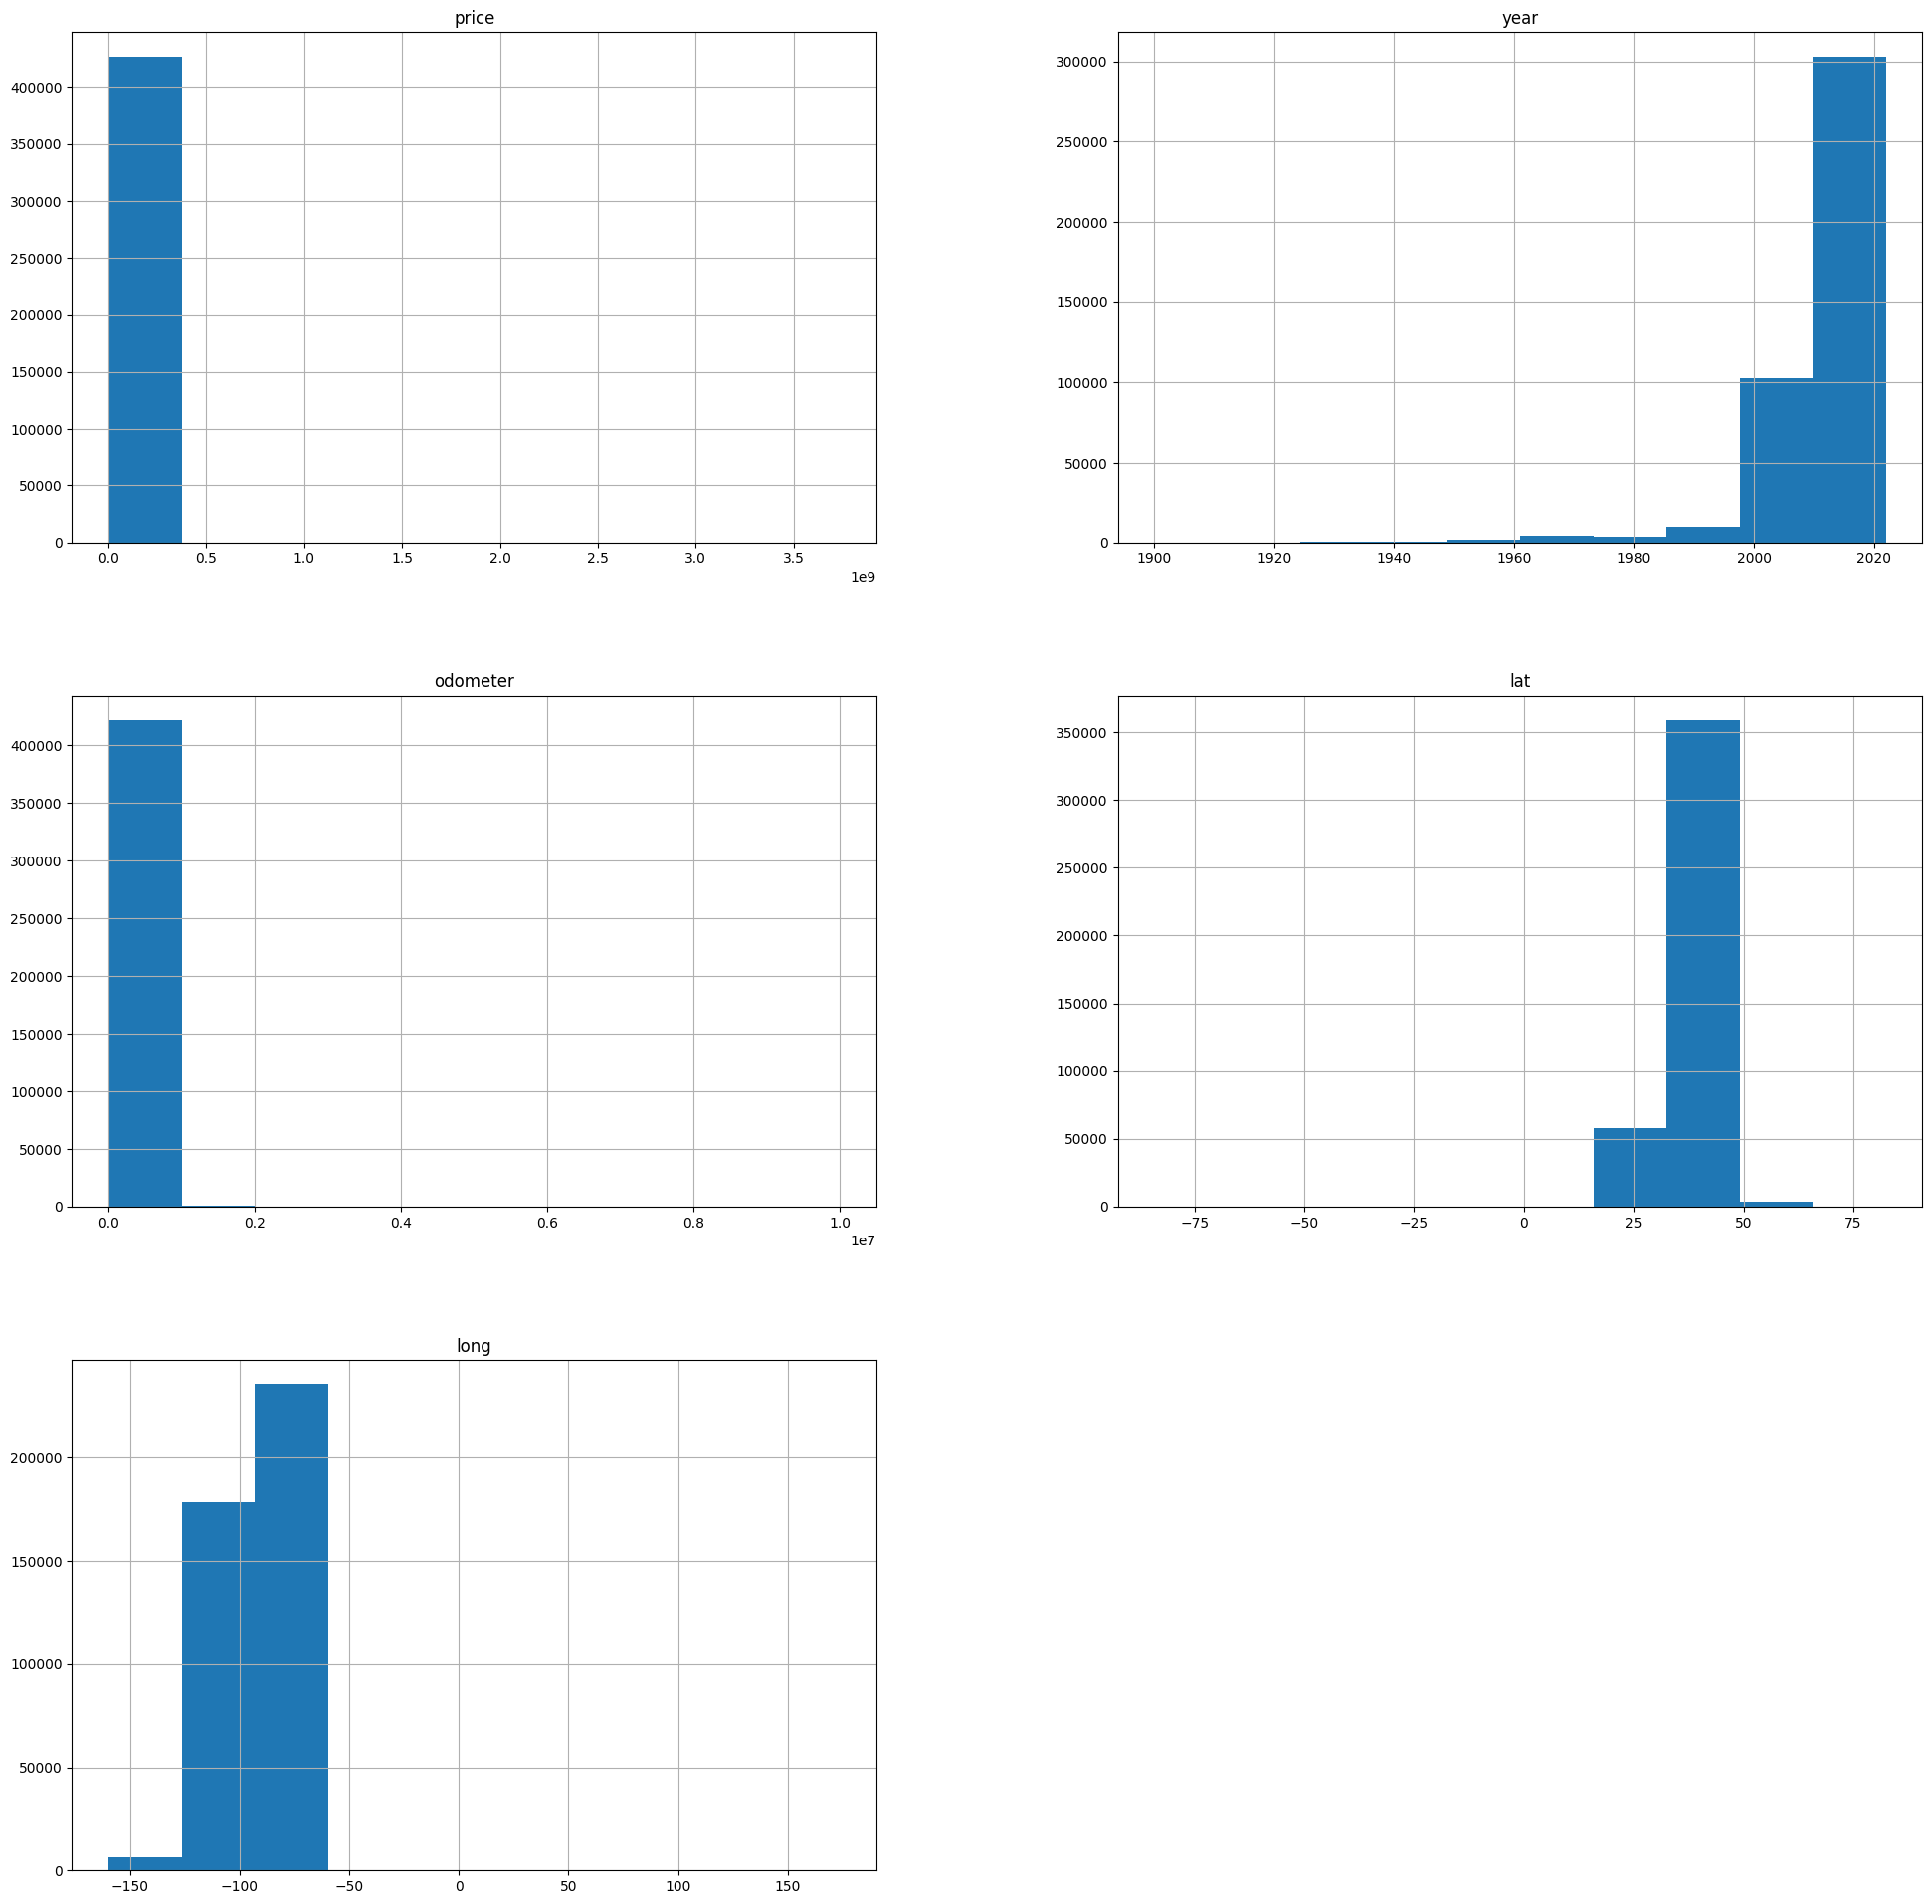

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
vehicles.hist(figsize=(24,24))
plt.show()

# Depending on whatever sample returns it gets stuck i think
#sns.pairplot(vehicles.sample(25000))

